# PDIE8 - Processamento Digital de Imagem

![Capa](https://m.media-amazon.com/images/I/71wa841+qgL._AC_UF1000,1000_QL80_.jpg)

##### Repositorio dos Códigos feitos em aula da Disciplina

#### Feito por: Vinicius de Souza Santos BI3008061
#### Lecionado por: Murilo Varges

# Aula 6 - 04/09 - Filtragem Espacial

- Filtragem Espacial
 - Convolução e correlação
 - Máscaras de filmagem espacial

## Atividades - Filtragem Espacial

- Implementar a operação de convolução.
- Utilizando OPENCV, scipy função convolve e implementação manual.
- Implementar seguintes máscaras:
- - Média
- - Guassiano
- - Laplaciano
- - Sobel X
- - Sobel Y
- - Gradiente (Sobel X + Sobel Y)
- - Laplaciano somado a imagem original
- Utilizar as imagens já disponibilizadas: biel, lena, cameraman, etc.

## Utilizando a OpenCV

Importanto Bibliotecas

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Função de Convolução usando o OpenCV

In [7]:
def convolucao_opencv(imagem, kernel):
    return cv2.filter2D(imagem, -1, kernel)

Definindo os kernels

In [38]:
# Média
media = np.ones((3, 3), dtype=np.float32) / 9

# Gaussiano
gaussiano = cv2.getGaussianKernel(5, 1) * cv2.getGaussianKernel(5, 1).T

# Laplaciano
laplaciano = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float32)

# Sobel X
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)

# Sobel Y
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

Carregando o diretorio das Imagens

In [40]:
imagens_info = {
    "lena": {
        "path": "lena.jpg",
        "data": None
    },
    "biel": {
        "path": "biel.png",
        "data": None
    },
    "cameraman": {
        "path": "cameraman.tif",
        "data": None
    }
}

diretorio = "/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 6/image/"

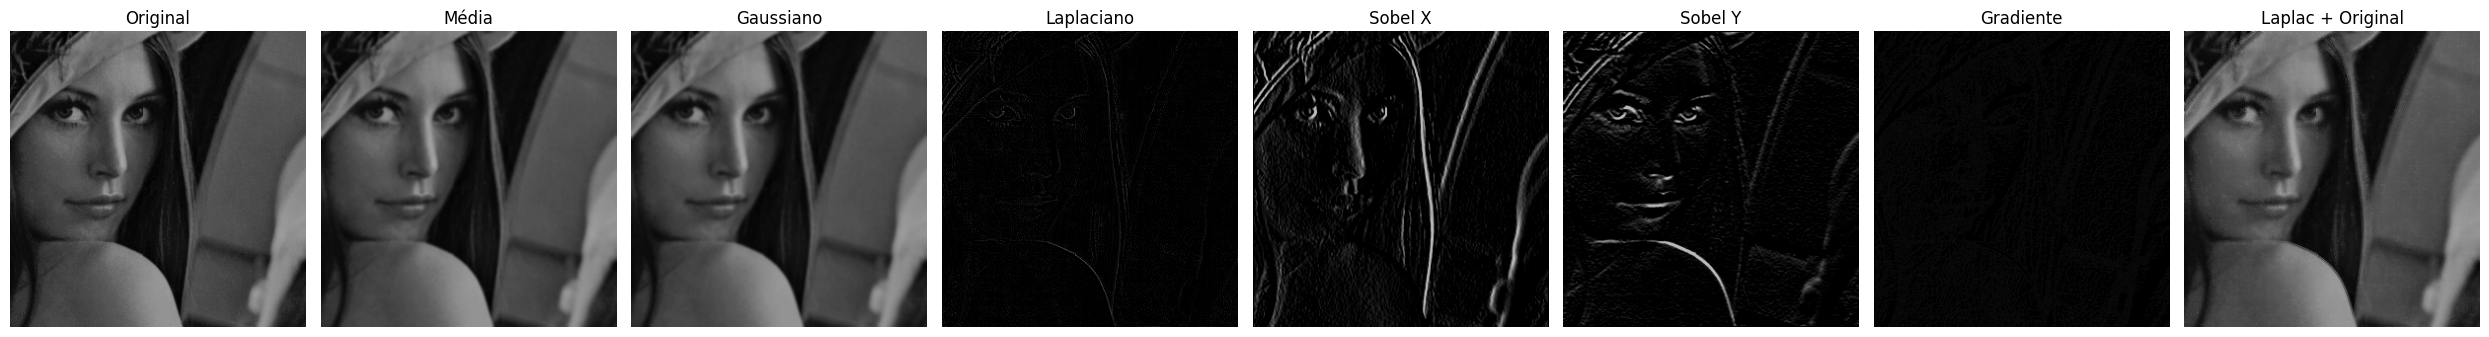

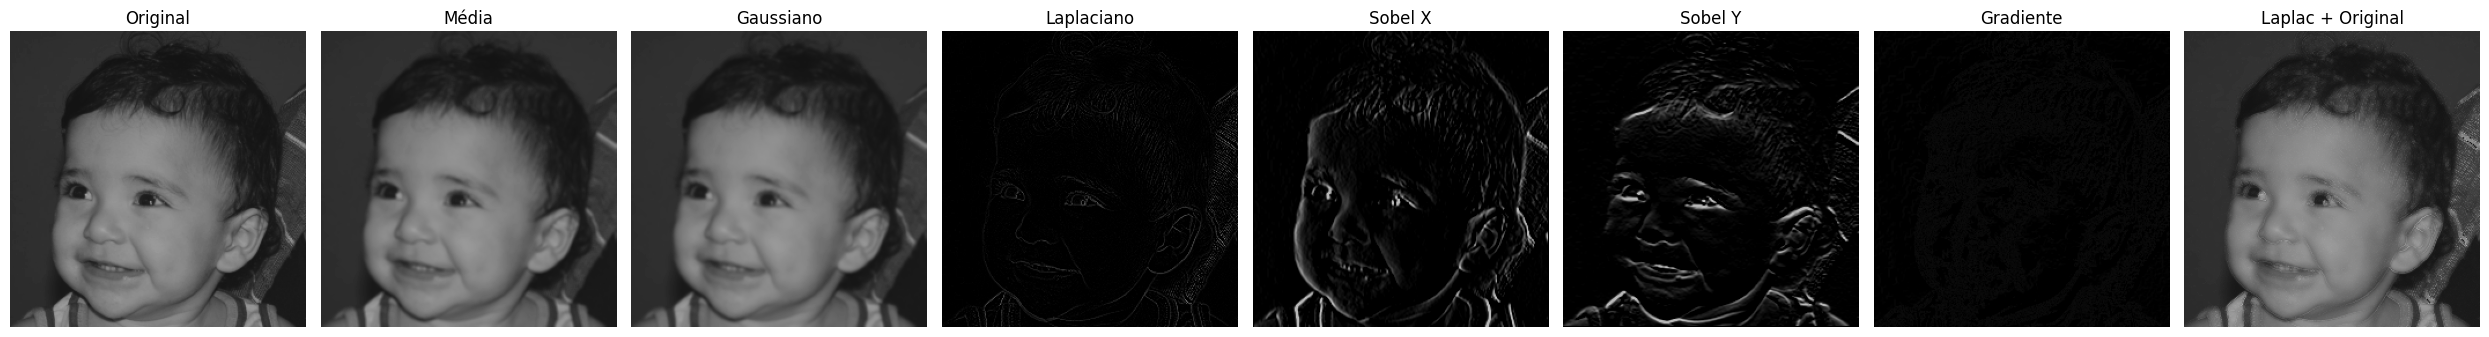

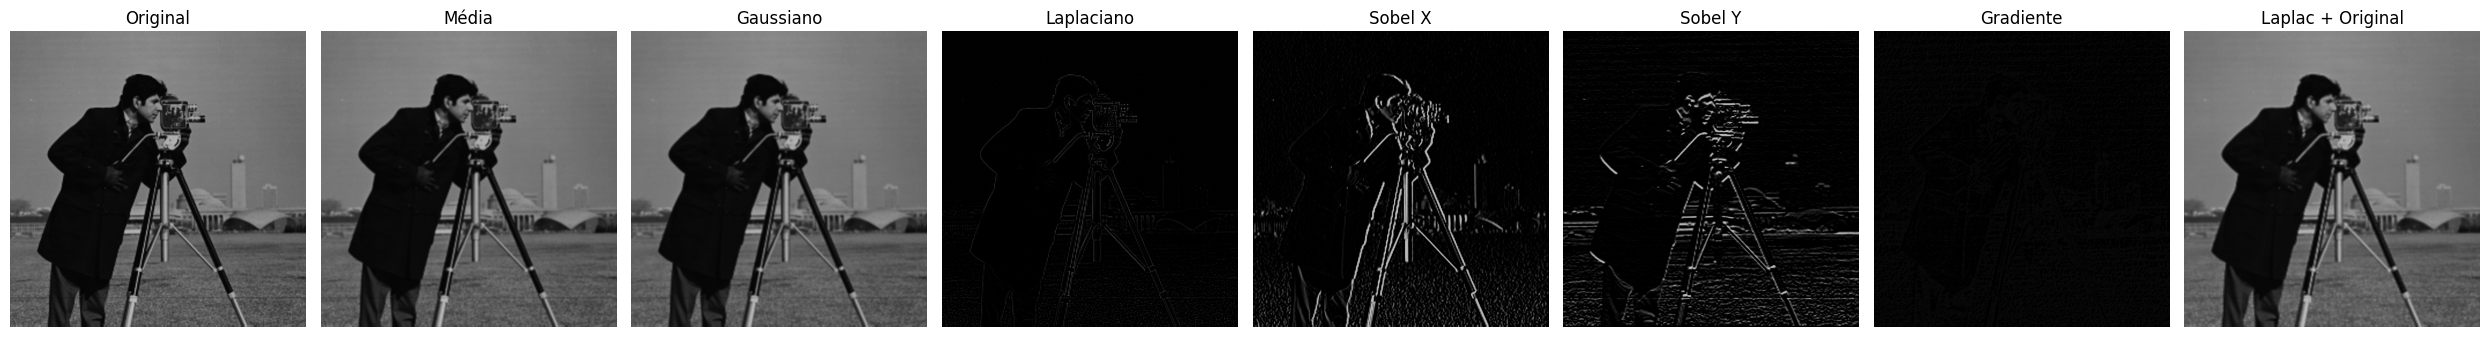

In [41]:
for nome, info in imagens_info.items():
    imagem = cv2.imread(diretorio + info["path"], cv2.IMREAD_GRAYSCALE)
    imagens_info[nome]["data"] = imagem

for nome, info in imagens_info.items():
    imagem = info["data"]

    imagem_media = convolucao_opencv(imagem, media)
    imagem_gauss = convolucao_opencv(imagem, gaussiano)
    imagem_laplac = convolucao_opencv(imagem, laplaciano)
    imagem_sobel_x = convolucao_opencv(imagem, sobel_x)
    imagem_sobel_y = convolucao_opencv(imagem, sobel_y)
    imagem_gradiente = np.sqrt(imagem_sobel_x**2 + imagem_sobel_y**2)
    imagem_laplac_original = imagem + imagem_laplac

    fig, axs = plt.subplots(1, 8, figsize=(25, 5))
    axs[0].imshow(imagem, cmap='gray', vmin = 0, vmax = 350)
    axs[0].set_title('Original')
    axs[0].axis('off')
    axs[1].imshow(imagem_media, cmap='gray', vmin = 0, vmax = 350)
    axs[1].set_title('Média')
    axs[1].axis('off')
    axs[2].imshow(imagem_gauss, cmap='gray', vmin = 0, vmax = 350)
    axs[2].set_title('Gaussiano')
    axs[2].axis('off')
    axs[3].imshow(imagem_laplac, cmap='gray', vmin = 0, vmax = 350)
    axs[3].set_title('Laplaciano')
    axs[3].axis('off')
    axs[4].imshow(imagem_sobel_x, cmap='gray', vmin = 0, vmax = 350)
    axs[4].set_title('Sobel X')
    axs[4].axis('off')
    axs[5].imshow(imagem_sobel_y, cmap='gray', vmin = 0, vmax = 350)
    axs[5].set_title('Sobel Y')
    axs[5].axis('off')
    axs[6].imshow(imagem_gradiente, cmap='gray', vmin = 0, vmax = 350)
    axs[6].set_title('Gradiente')
    axs[6].axis('off')
    axs[7].imshow(imagem_laplac_original, cmap='gray', vmin = 0, vmax = 350)
    axs[7].set_title('Laplac + Original')
    axs[7].axis('off')

    plt.tight_layout()
    plt.show()

## Utilizando o Scipy


Importando Bibliotecas

In [33]:
import cv2
import numpy as np
from scipy.signal import gaussian, convolve2d
import matplotlib.pyplot as plt

Definindo os Kernels

In [34]:
# Média
media = np.ones((3, 3)) / 9

# Gaussiano
def gaussian_kernel(size: int, sigma: float):
    """ Retorna um kernel gaussiano usando scipy. """
    gauss_1d = gaussian(size, sigma)
    gauss_2d = np.outer(gauss_1d, gauss_1d)
    return gauss_2d / gauss_2d.sum()

gaussiano = gaussian_kernel(5, 1)

# Laplaciano
laplaciano = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

# Sobel X
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# Sobel Y
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

C:\Users\vinny\AppData\Local\Temp\ipykernel_22028\3338403741.py:7: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gauss_1d = gaussian(size, sigma)


Função De Covolução usando Scipy

In [35]:
def convolucao_scipy(imagem, kernel):
    return convolve2d(imagem, kernel, mode='same', boundary='wrap')

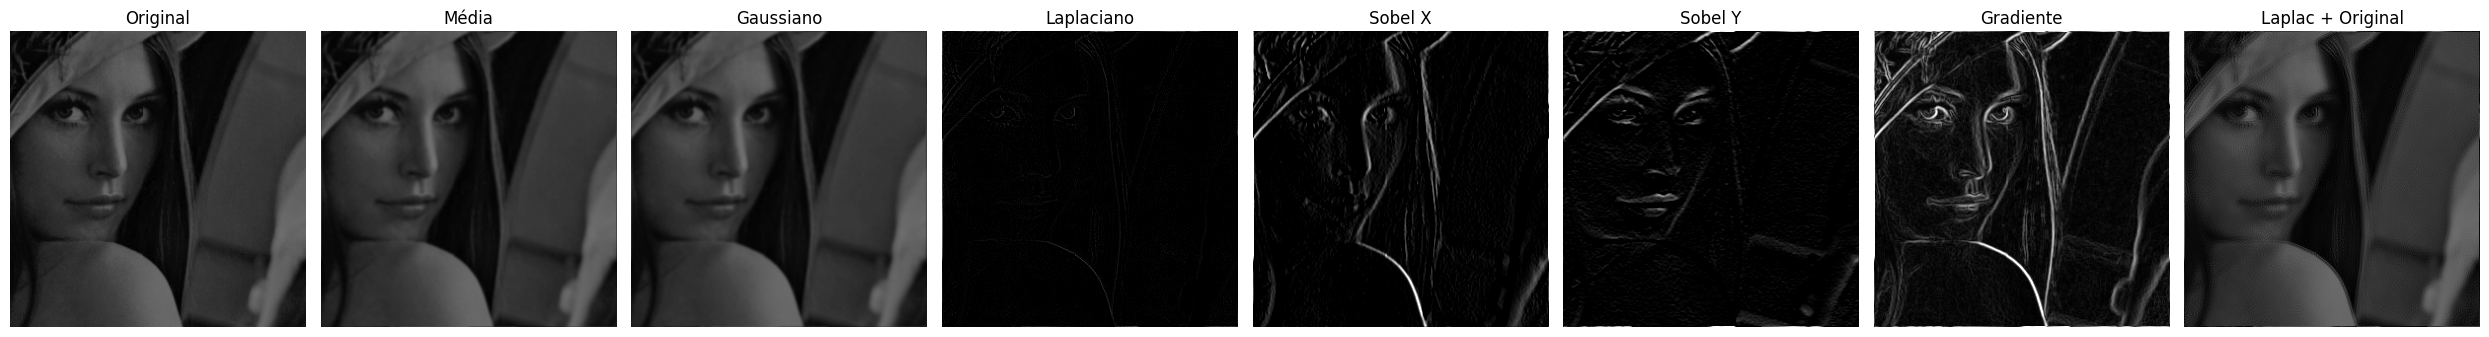

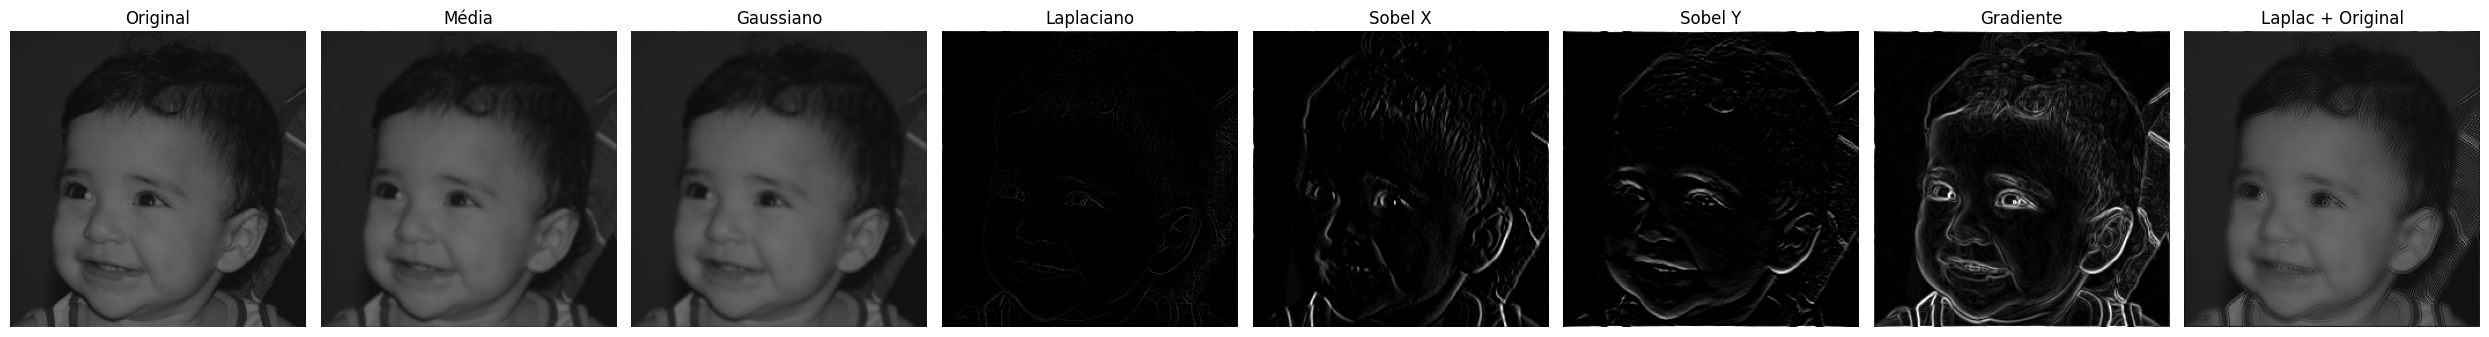

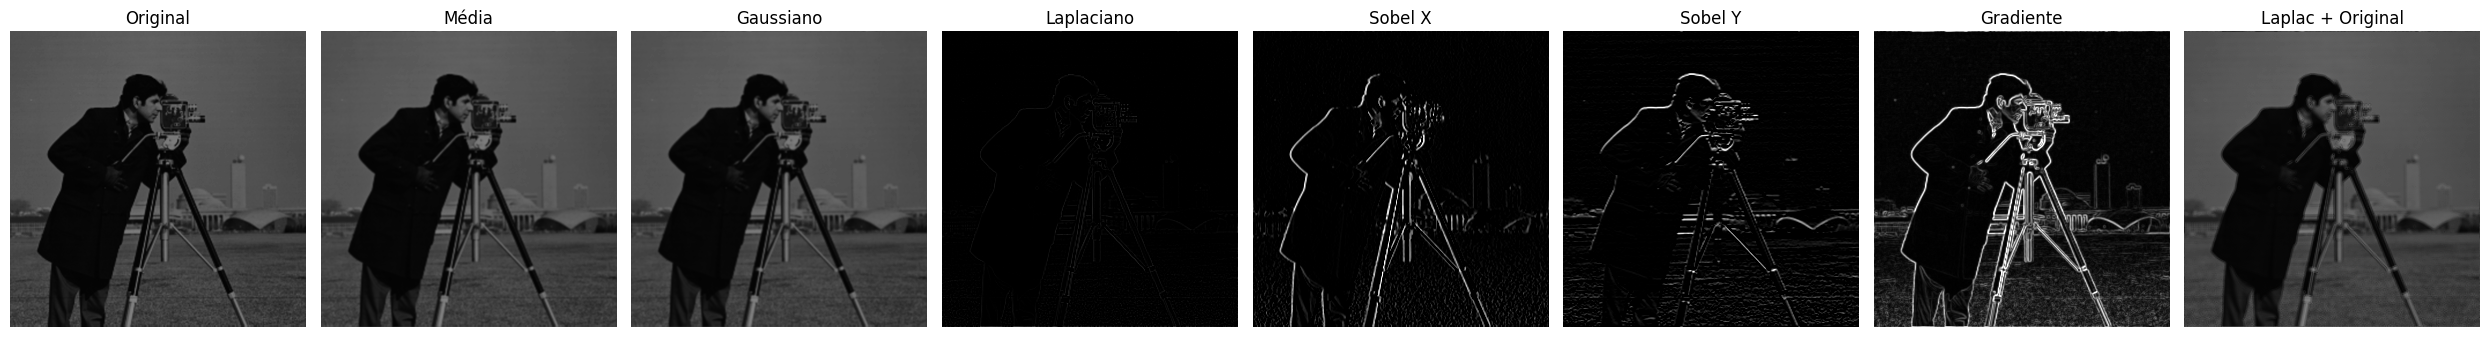

In [36]:
for nome, info in imagens_info.items():
    imagem = cv2.imread(diretorio + info["path"], cv2.IMREAD_GRAYSCALE)
    imagens_info[nome]["data"] = imagem

for nome, info in imagens_info.items():
    imagem = info["data"]

    imagem_media = convolucao_scipy(imagem, media)
    imagem_gauss = convolucao_scipy(imagem, gaussiano)
    imagem_laplac = convolucao_scipy(imagem, laplaciano)
    imagem_sobel_x = convolucao_scipy(imagem, sobel_x)
    imagem_sobel_y = convolucao_scipy(imagem, sobel_y)
    imagem_gradiente = np.sqrt(imagem_sobel_x**2 + imagem_sobel_y**2)
    imagem_laplac_original = imagem + imagem_laplac
    
    fig, axs = plt.subplots(1, 8, figsize=(25, 5))
    axs[0].imshow(imagem, cmap='gray', vmin = 0, vmax = 500)
    axs[0].set_title('Original')
    axs[0].axis('off')
    axs[1].imshow(imagem_media, cmap='gray', vmin = 0, vmax = 500)
    axs[1].set_title('Média')
    axs[1].axis('off')
    axs[2].imshow(imagem_gauss, cmap='gray', vmin = 0, vmax = 500)
    axs[2].set_title('Gaussiano')
    axs[2].axis('off')
    axs[3].imshow(imagem_laplac, cmap='gray', vmin = 0, vmax = 500)
    axs[3].set_title('Laplaciano')
    axs[3].axis('off')
    axs[4].imshow(imagem_sobel_x, cmap='gray', vmin = 0, vmax = 500)
    axs[4].set_title('Sobel X')
    axs[4].axis('off')
    axs[5].imshow(imagem_sobel_y, cmap='gray', vmin = 0, vmax = 500)
    axs[5].set_title('Sobel Y')
    axs[5].axis('off')
    axs[6].imshow(imagem_gradiente, cmap='gray', vmin = 0, vmax = 500)
    axs[6].set_title('Gradiente')
    axs[6].axis('off')
    axs[7].imshow(imagem_laplac_original, cmap='gray', vmin = 0, vmax = 500)
    axs[7].set_title('Laplac + Original')
    axs[7].axis('off')

    plt.tight_layout()
    plt.show()

## Utilizando o Metodo Manual

Importando Biblioteca

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Definindo Kernels

In [26]:
# Média
media = np.ones((3, 3)) / 9

# Gaussiano
def gaussian_kernel(size: int, sigma: float):
    """ Retorna um kernel gaussiano usando numpy. """
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2) / (2.0 * sigma**2)))
    return g / g.sum()

gaussiano = gaussian_kernel(5, 1)

# Laplaciano
laplaciano = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

# Sobel X
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# Sobel Y
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

Função de Convolução Manual

In [30]:
def convolucao_manual(imagem, kernel):
    altura, largura = imagem.shape
    k_altura, k_largura = kernel.shape

    padding_altura = k_altura // 2
    padding_largura = k_largura // 2

    imagem_padded = np.pad(imagem, ((padding_altura, padding_altura), (padding_largura, padding_largura)), mode='constant')
    saida = np.zeros(imagem.shape)

    for y in range(altura):
        for x in range(largura):
            saida[y, x] = np.sum(imagem_padded[y:y + k_altura, x:x + k_largura] * kernel)
            
    return saida

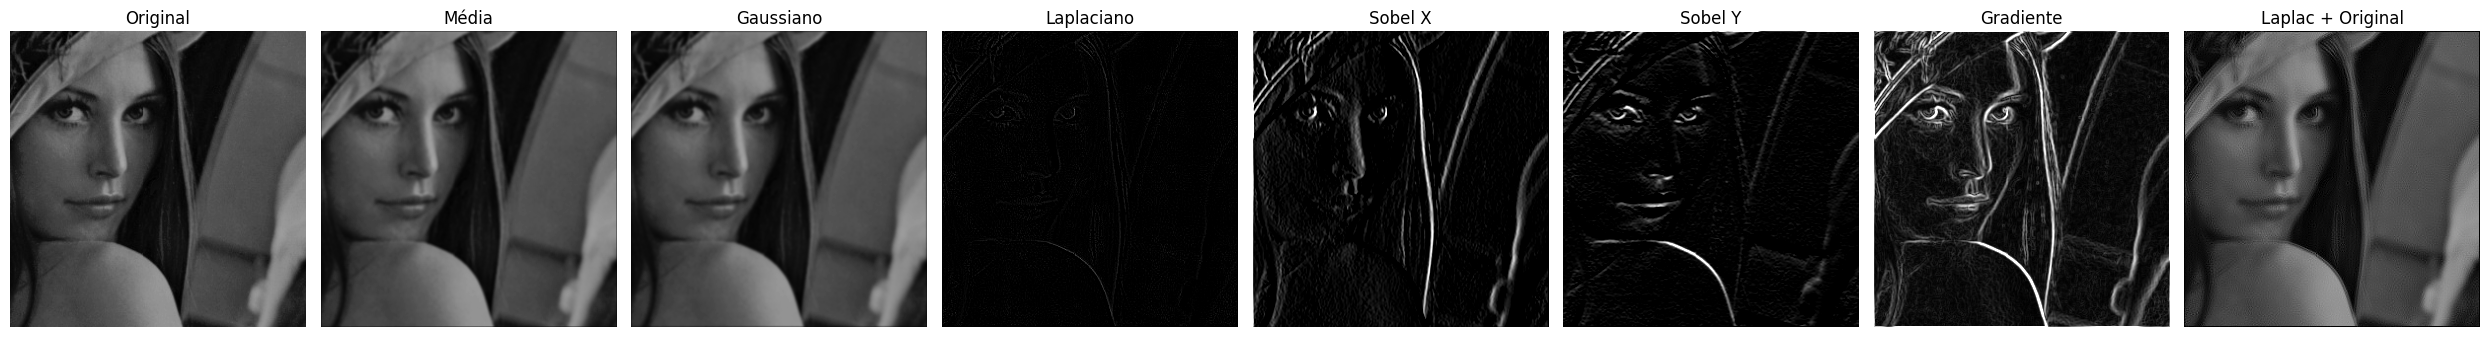

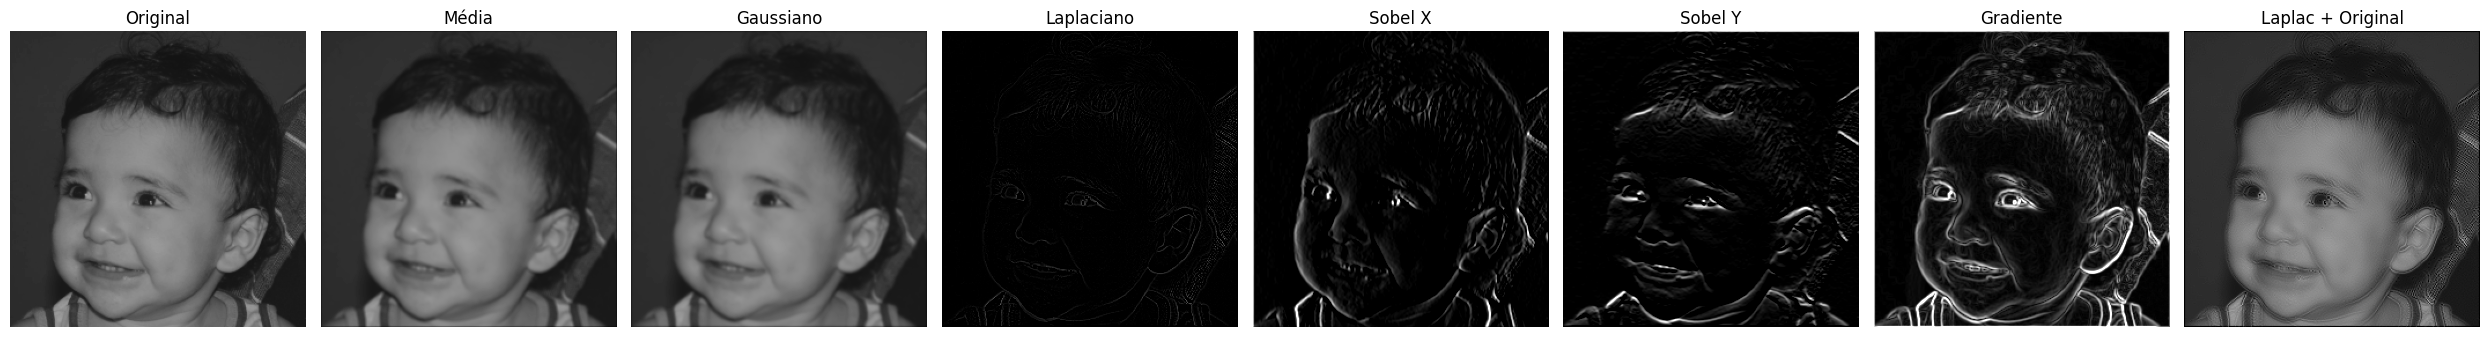

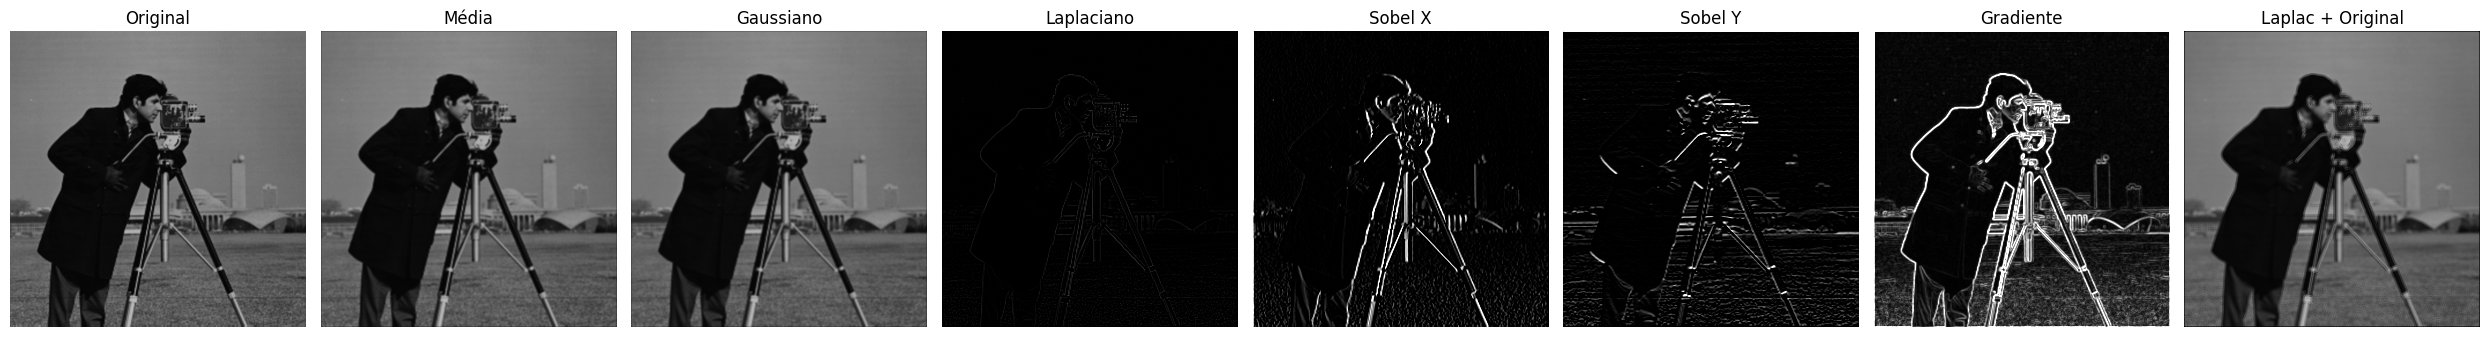

In [31]:
for nome, info in imagens_info.items():
    imagem = cv2.imread(diretorio + info["path"], cv2.IMREAD_GRAYSCALE)
    imagens_info[nome]["data"] = imagem

for nome, info in imagens_info.items():
    imagem = info["data"]

    imagem_media = convolucao_manual(imagem, media)
    imagem_gauss = convolucao_manual(imagem, gaussiano)
    imagem_laplac = convolucao_manual(imagem, laplaciano)
    imagem_sobel_x = convolucao_manual(imagem, sobel_x)
    imagem_sobel_y = convolucao_manual(imagem, sobel_y)
    imagem_gradiente = np.sqrt(imagem_sobel_x**2 + imagem_sobel_y**2)
    imagem_laplac_original = imagem + imagem_laplac

    fig, axs = plt.subplots(1, 8, figsize=(25, 5))
    axs[0].imshow(imagem, cmap='gray', vmin = 0, vmax = 350)
    axs[0].set_title('Original')
    axs[0].axis('off')
    axs[1].imshow(imagem_media, cmap='gray', vmin = 0, vmax = 350)
    axs[1].set_title('Média')
    axs[1].axis('off')
    axs[2].imshow(imagem_gauss, cmap='gray', vmin = 0, vmax = 350)
    axs[2].set_title('Gaussiano')
    axs[2].axis('off')
    axs[3].imshow(imagem_laplac, cmap='gray', vmin = 0, vmax = 350)
    axs[3].set_title('Laplaciano')
    axs[3].axis('off')
    axs[4].imshow(imagem_sobel_x, cmap='gray', vmin = 0, vmax = 350)
    axs[4].set_title('Sobel X')
    axs[4].axis('off')
    axs[5].imshow(imagem_sobel_y, cmap='gray', vmin = 0, vmax = 350)
    axs[5].set_title('Sobel Y')
    axs[5].axis('off')
    axs[6].imshow(imagem_gradiente, cmap='gray', vmin = 0, vmax = 350)
    axs[6].set_title('Gradiente')
    axs[6].axis('off')
    axs[7].imshow(imagem_laplac_original, cmap='gray' , vmin = 0, vmax = 350)
    axs[7].set_title('Laplac + Original')
    axs[7].axis('off')

    plt.tight_layout()
    plt.show()